In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%run ../funtion/powerlaw_psd_gaussian.ipynb
%run ../funtion/Funciones.ipynb

# Exercicio 2
# Repita o exercício anterior considerando, entretanto, o algoritmo colorednoise.py .

# Criando famílias de ruído

In [8]:
white_noise = powerlaw_psd_gaussian(0,8192)
pink_noise = powerlaw_psd_gaussian(1,8192)
red_noise = powerlaw_psd_gaussian(2,8192)

In [9]:
white_noise = np.zeros([8192,10])
pink_noise = np.zeros([8192,10])
red_noise = np.zeros([8192,10])

for t in range(10):
    white_noise[:,t] = powerlaw_psd_gaussian(0,8192)
    pink_noise[:,t] = powerlaw_psd_gaussian(1,8192)
    red_noise[:,t] = powerlaw_psd_gaussian(2,8192)

Text(0.5, 1.0, 'Red Noise')

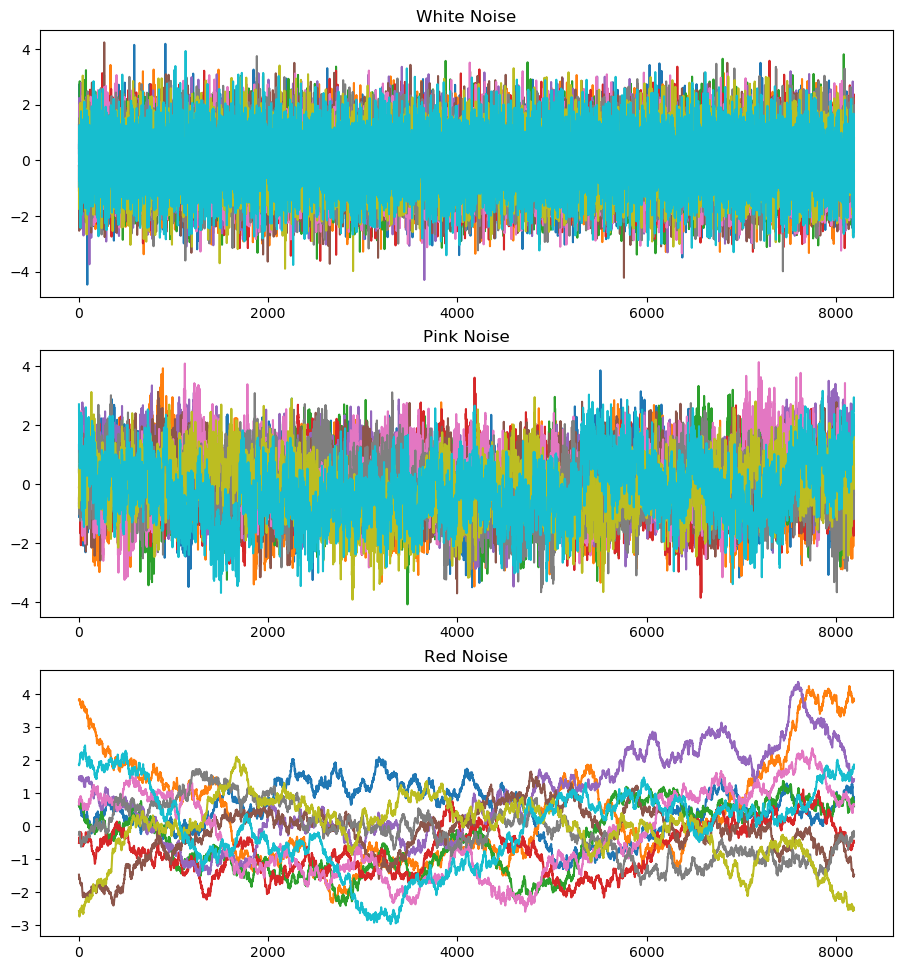

In [10]:
fig1 = plt.figure(figsize=(11,12),dpi=100)

plt.subplot(3, 1, 1)
plt.plot(white_noise)
plt.title('White Noise')

plt.subplot(3, 1, 2)
plt.plot(pink_noise)
plt.title('Pink Noise')

plt.subplot(3, 1, 3)
plt.plot(red_noise)
plt.title('Red Noise')

# Series Normalizadas

In [11]:
white_norm,white_esta = Normalizar1(white_noise)
pink_norm,pink_esta = Normalizar1(pink_noise)
red_norm,red_esta = Normalizar1(red_noise)

In [12]:
white_esta = white_esta.drop(['Group','Cor'],axis=1)
white_esta['Group'] = 'white'

pink_esta = pink_esta.drop(['Group','Cor'],axis=1)
pink_esta['Group'] = 'pink'

red_esta = red_esta.drop(['Group','Cor'],axis=1)
red_esta['Group'] = 'red'

Text(0.5, 1.0, 'Red Noise')

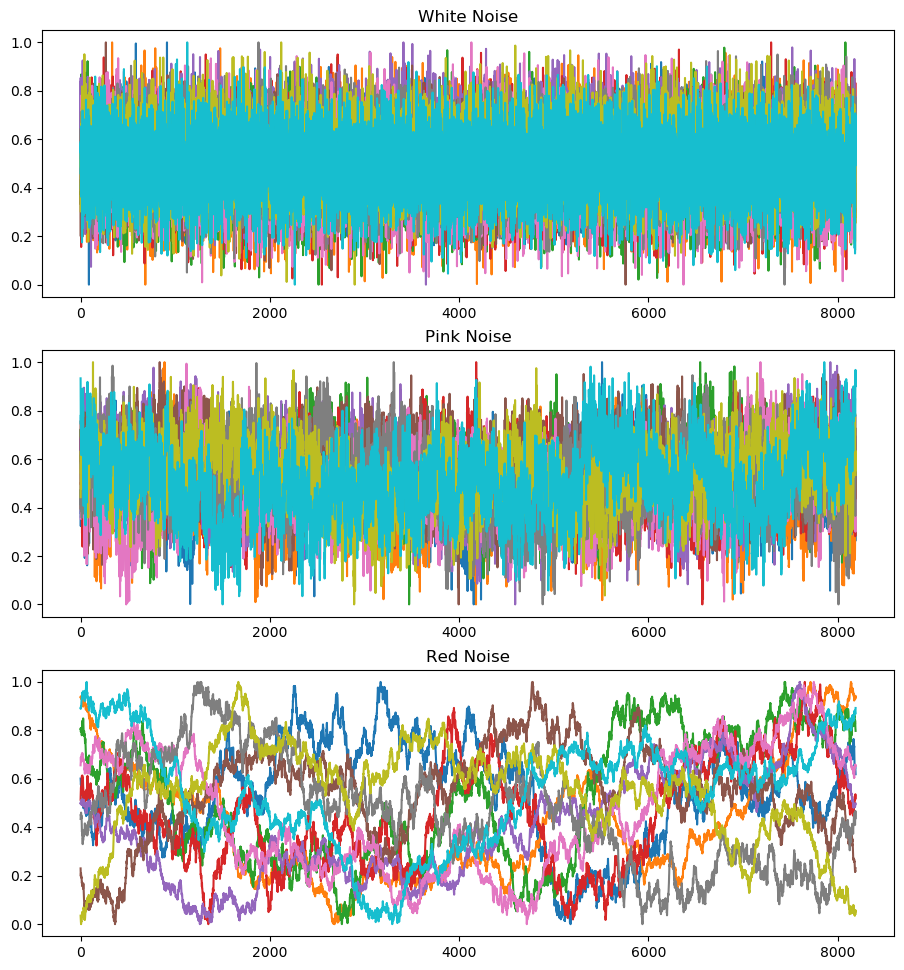

In [13]:
fig2 = plt.figure(figsize=(11,12),dpi=100)

plt.subplot(3, 1, 1)
plt.plot(white_norm)
plt.title('White Noise')

plt.subplot(3, 1, 2)
plt.plot(pink_norm)
plt.title('Pink Noise')

plt.subplot(3, 1, 3)
plt.plot(red_norm)
plt.title('Red Noise')

# Diagrama de dispersão

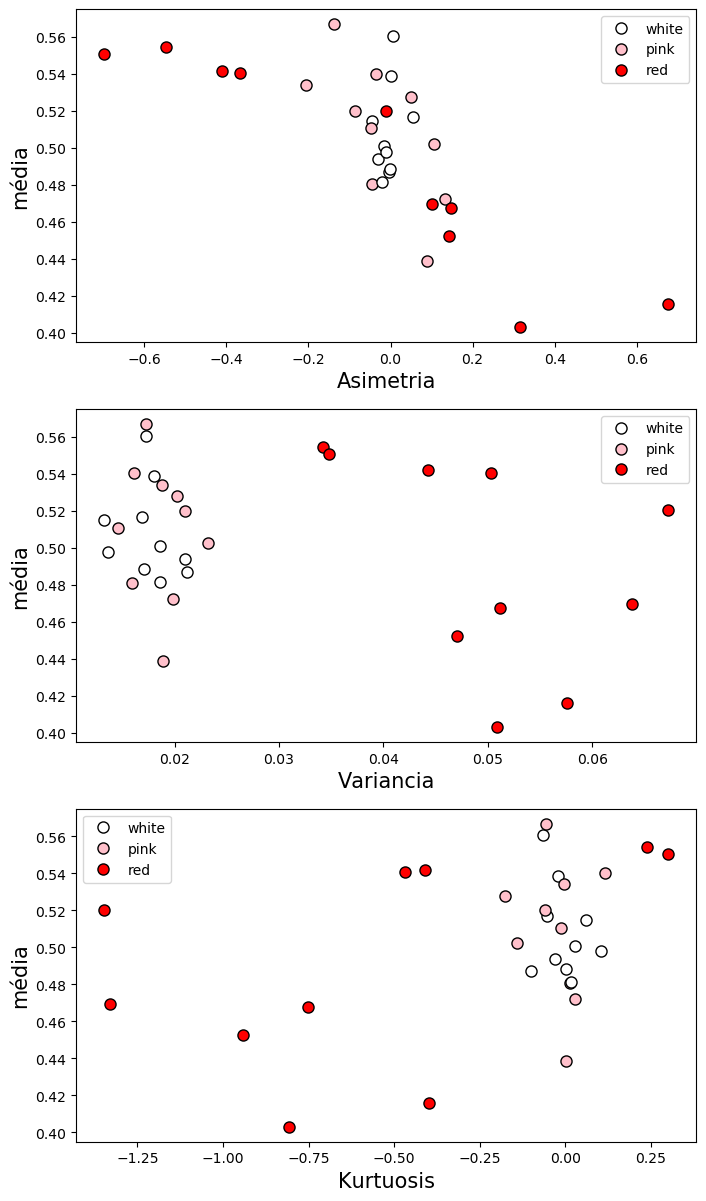

In [35]:
fig2 = plt.figure(figsize=(8,15),dpi=100)

plt.subplot(3,1,1)
for i in range(10):
    plt.plot(white_esta['Asim'][i],white_esta['Prom'][i],'ow',markeredgecolor='k',markersize=8,label='white')
    plt.plot(pink_esta['Asim'][i],pink_esta['Prom'][i],'o',color='pink',markeredgecolor='k',markersize=8,label='pink')
    plt.plot(red_esta['Asim'][i],red_esta['Prom'][i],'or',markeredgecolor='k',markersize=8,label='red')
    plt.xlabel('Asimetria',fontsize=15)
    plt.ylabel('média',fontsize=15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
plt.subplot(3,1,2)
for i in range(10):
    plt.plot(white_esta['Vari'][i],white_esta['Prom'][i],'ow',markeredgecolor='k',markersize=8,label='white')
    plt.plot(pink_esta['Vari'][i],pink_esta['Prom'][i],'o',color='pink',markeredgecolor='k',markersize=8,label='pink')
    plt.plot(red_esta['Vari'][i],red_esta['Prom'][i],'or',markeredgecolor='k',markersize=8,label='red')
    plt.xlabel('Variancia',fontsize=15)
    plt.ylabel('média',fontsize=15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
plt.subplot(3,1,3)
for i in range(10):
    plt.plot(white_esta['Curt'][i],white_esta['Prom'][i],'ow',markeredgecolor='k',markersize=8,label='white')
    plt.plot(pink_esta['Curt'][i],pink_esta['Prom'][i],'o',color='pink',markeredgecolor='k',markersize=8,label='pink')
    plt.plot(red_esta['Curt'][i],red_esta['Prom'][i],'or',markeredgecolor='k',markersize=8,label='red')
    plt.xlabel('Kurtuosis',fontsize=15)
    plt.ylabel('média',fontsize=15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

### Diferente do exercício anterior, onde o comportamento entre a média e a assimetria era linear, nesse caso, esse comportamento linear é apresentado para ruído rosa e branco com uma inclinação mais acentuada e com uma inclinação menos acentuada para o ruído vermelho.

### Com as três figuras anteriores, pode-se observar que o ruído branco e rosa são bastante semelhantes e a maior diferença ocorre com o ruído vermelho.

## Plotando as series normalizadas

In [38]:
frames = [white_esta,pink_esta,red_esta]
result = pd.concat(frames,ignore_index=True)

In [45]:
col = ['white','pink','red']

<Figure size 1000x1000 with 0 Axes>

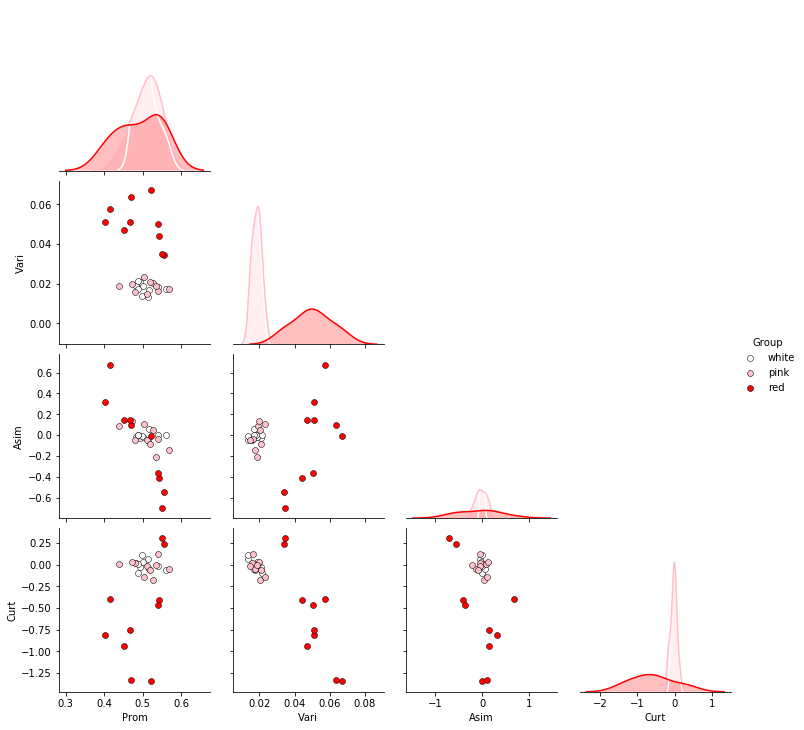

In [65]:
fig3 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result,hue="Group",palette=col,corner=True,plot_kws=dict(edgecolor="k", linewidth=0.5))

### Pode-se ver como o Red noise tem características diferentes em relação ao White noise e Pink noise, talvez a coisa mais simples seria obter dois grupos.

# K-means
### Para aplicar o método K-means aos dados, primeiro é necessário conhecer o número adequado de grupos, para isso é utilizado a grafica Elbow Curve.

In [66]:
X = np.array(result[["Vari","Asim","Curt"]])
y = np.array(result['Group'])
X.shape

(30, 3)

In [67]:
Nc = range(1,16)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

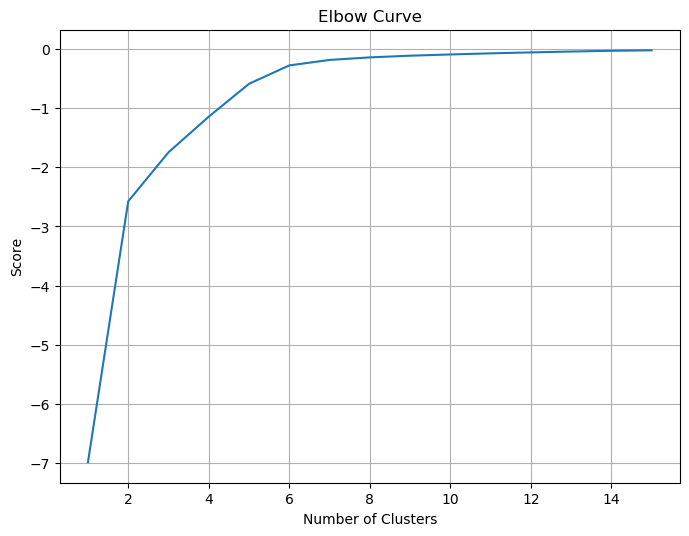

In [68]:
fig3 = plt.figure(figsize=(8,6),dpi=100)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

### Onde valores adequados podem ser percebidos entre 2 e 6 grupos. Quatro grupos foram utilizados para esta experiência, considerando apenas os vairables: média, variância, assimetria e kurtuosis.

In [69]:
X = np.array(result.drop(['Group'],axis=1))

In [70]:
kmeans = KMeans(n_clusters=2,random_state=0)

In [71]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [72]:
result['K-classes'] = kmeans.labels_

# Resultados

<Figure size 1000x1000 with 0 Axes>

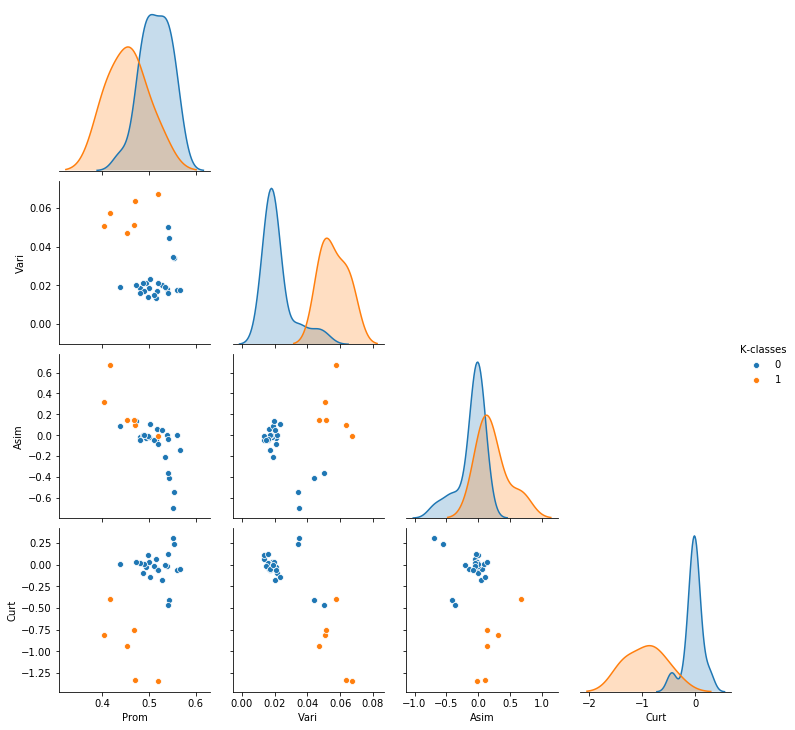

In [73]:
fig2 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result.drop(['Group'],axis=1),'K-classes',corner=True)

# Mostrando os Grupos

In [74]:
k0 = result[result['K-classes'] == 0]
k1 = result[result['K-classes'] == 1]

In [75]:
result[result['K-classes'] == 0]

,Prom,Vari,Asim,Curt,Group,K-classes
0,0.514823,0.013295,-0.045626,0.060859,white,0
1,0.493962,0.020992,-0.030458,-0.029151,white,0
2,0.481528,0.018651,-0.021672,0.016657,white,0
3,0.500816,0.018653,-0.015460,0.029291,white,0
4,0.560438,0.017227,0.005194,-0.065839,white,0
5,0.497850,0.013665,-0.010282,0.105354,white,0
6,0.487095,0.021197,-0.003550,-0.101023,white,0
7,0.516740,0.016918,0.054532,-0.053756,white,0
8,0.538725,0.018056,0.002027,-0.020586,white,0
9,0.488535,0.017114,-0.002266,0.002120,white,0


In [27]:
result[result['K-classes'] == 1]

,Prom,Vari,Asim,Curt,Group,K-classes
21,0.415931,0.057527,0.676221,-0.399526,red,1
22,0.520164,0.067242,-0.011823,-1.346142,red,1
23,0.452512,0.047002,0.142332,-0.941578,red,1
24,0.403187,0.050891,0.315702,-0.808482,red,1
26,0.469624,0.063760,0.099811,-1.330073,red,1
27,0.467619,0.051183,0.146090,-0.753014,red,1


### A partir dos resultados pode-se verificar como o K-means agrupa adequadamente o red noise, com exceção de um caso enquanto o white noise e pink noise em outro grupo, a diferença acentuada do comportamento do ruído vermelho fornece características métricas das quais, por sua vez, tornam o agrupamento mais adequado.